In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.utils import check_random_state
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler, RobustScaler
from scipy import stats
plt.rcParams['font.family'] = 'NanumGothic'
df = pd.read_csv("../../../data/all_preprocessing_finish_without_entity.csv", encoding = "euc-kr")

class KMeans(BaseEstimator):

    def __init__(self, k, max_iter=100, random_state=0, tol=1e-4):
        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state
        self.tol = tol

    def _e_step(self, X):
        self.labels_ = euclidean_distances(X, self.cluster_centers_,
                                     squared=True).argmin(axis=1)

    def _average(self, X):
        return X.mean(axis=0)

    def _m_step(self, X):
        X_center = None
        for center_id in range(self.k):
            center_mask = self.labels_ == center_id
            if not np.any(center_mask):
                # The centroid of empty clusters is set to the center of
                # everything
                if X_center is None:
                    X_center = self._average(X)
                self.cluster_centers_[center_id] = X_center
            else:
                self.cluster_centers_[center_id] = \
                    self._average(X[center_mask])

    def fit(self, X, y=None):
        n_samples = X.shape[0]
        vdata = np.mean(np.var(X, 0))

        random_state = check_random_state(self.random_state)
        self.labels_ = random_state.permutation(n_samples)[:self.k]
        self.cluster_centers_ = X[self.labels_]

        for i in range(self.max_iter):
            centers_old = self.cluster_centers_.copy()

            self._e_step(X)
            self._m_step(X)

            if np.sum((centers_old - self.cluster_centers_) ** 2) < self.tol * vdata:
                break

        return self

class KMedians(KMeans):

    def _e_step(self, X):
        self.labels_ = manhattan_distances(X, self.cluster_centers_).argmin(axis=1)

    def _average(self, X):
        return np.median(X, axis=0)

In [7]:
df.drop("자본과부채총계", axis = 1, inplace = True)
idx = df.iloc[:,9:].isnull().sum().sort_values().head(11).index

In [18]:
idx2 = df.iloc[:,:9].columns
use_df = df[list(idx2) + list(idx)]
for col in use_df.iloc[:,9:].columns:
    print(f"{col}의 0을 가진 행의 갯수 : {use_df[use_df[col] == 0].shape[0]}")
    
# 금융부채, 유형자산, 금융자산, 비유동자산, 대손충당금
use_df.drop(["금융부채", "유형자산", "금융자산",  "대손충당금"], axis = 1, inplace = True)

use_df.columns[9:]

자본총계의 0을 가진 행의 갯수 : 0
금융부채의 0을 가진 행의 갯수 : 618
유동자산의 0을 가진 행의 갯수 : 0
현금및현금성자산의 0을 가진 행의 갯수 : 0
유동부채의 0을 가진 행의 갯수 : 0
자산총계의 0을 가진 행의 갯수 : 0
유형자산의 0을 가진 행의 갯수 : 16
금융자산의 0을 가진 행의 갯수 : 227
비유동자산의 0을 가진 행의 갯수 : 0
대손충당금의 0을 가진 행의 갯수 : 11119
부채총계의 0을 가진 행의 갯수 : 0


C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['자본총계', '유동자산', '현금및현금성자산', '유동부채', '자산총계', '비유동자산', '부채총계'], dtype='object')

In [47]:
# use_df의 기술통계
descriptive = use_df.describe()
use_df.describe()

,업종,결산월,자본총계,유동자산,현금및현금성자산,유동부채,자산총계,비유동자산,부채총계
count,11624.000000,11624.000000,1.162400e+04,1.162400e+04,1.162400e+04,1.162400e+04,1.162400e+04,1.162400e+04,1.162400e+04
mean,360.067275,11.880936,9.031057e+11,7.087627e+11,1.203542e+11,5.199596e+11,1.914989e+12,1.115036e+12,1.011888e+12
std,180.740090,0.932886,7.287930e+12,5.178911e+12,8.228947e+11,2.749164e+12,1.285524e+13,7.558700e+12,6.810066e+12
min,11.000000,2.000000,-7.081860e+11,5.233252e+08,1.117407e+07,1.458624e+07,2.643665e+09,6.000000e+04,1.755529e+07
25%,241.000000,12.000000,5.279712e+10,4.561419e+10,6.935805e+09,2.314234e+10,9.595927e+10,4.103406e+10,3.213304e+10
50%,291.000000,12.000000,1.121269e+11,9.746091e+10,1.651458e+10,5.775126e+10,2.006542e+11,9.541478e+10,7.674728e+10
75%,474.000000,12.000000,2.898669e+11,2.547876e+11,4.648308e+10,1.825009e+11,5.943326e+11,2.937000e+11,2.653171e+11
max,969.000000,12.000000,2.663877e+14,1.867397e+14,3.054513e+13,6.908151e+13,3.574575e+14,1.793525e+14,1.684320e+14


In [50]:
q1 = use_df[(use_df["자산총계"] >= descriptive["자산총계"]["min"]) & (use_df["자산총계"] <= descriptive["자산총계"]["25%"])]
q2 = use_df[(use_df["자산총계"] > descriptive["자산총계"]["25%"]) & (use_df["자산총계"] <= descriptive["자산총계"]["50%"])]
q3 = use_df[(use_df["자산총계"] > descriptive["자산총계"]["50%"]) & (use_df["자산총계"] <= descriptive["자산총계"]["75%"])]
q4 = use_df[(use_df["자산총계"] > descriptive["자산총계"]["75%"]) & (use_df["자산총계"] <= descriptive["자산총계"]["max"])]

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


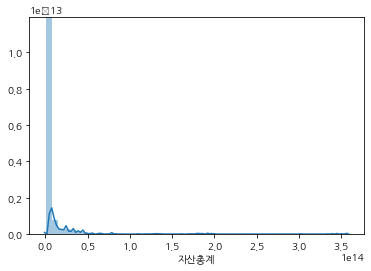

In [67]:
sns.distplot(q4["자산총계"])

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


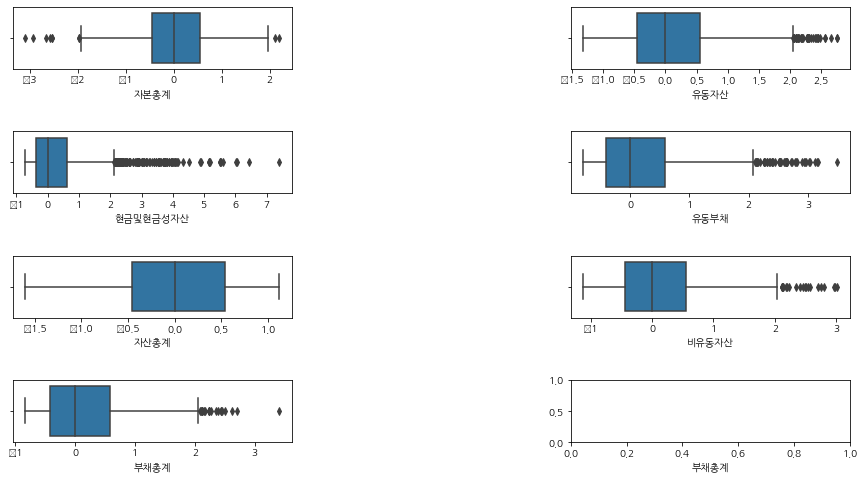

In [137]:
def boxplot(x):
    fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (15,8))
    sns.boxplot(x["자본총계"], ax = ax[0,0])
    plt.xlabel("자본총계")
    sns.boxplot(x["유동자산"], ax = ax[0,1])
    plt.xlabel("유동자산")
    sns.boxplot(x["현금및현금성자산"], ax = ax[1,0])
    plt.xlabel("현금및현금성자산")
    sns.boxplot(x["유동부채"], ax = ax[1,1])
    plt.xlabel("유동부채")
    sns.boxplot(x["자산총계"], ax = ax[2,0])
    plt.xlabel("자산총계")
    sns.boxplot(x["비유동자산"], ax = ax[2,1])
    plt.xlabel("비유동자산")
    sns.boxplot(x["부채총계"], ax = ax[3,0])
    plt.xlabel("부채총계")
    plt.subplots_adjust(wspace=1, hspace=1)
    
boxplot(q1)

In [127]:
def scaling(x):
    scaler = RobustScaler()
    X = scaler.fit_transform(x.iloc[:,9:])
    x.iloc[:,9:] = X
    X_data = x.iloc[:,9:]
    return X_data

q1_scale = scaling(q1)
q2_scale = scaling(q2)
q3_scale = scaling(q3)
q4_scale = scaling(q4)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [169]:
kmedians = KMedians(k =5)
kmedians.fit(np.array(q1_scale))
y_pred = kmedians.labels_
q1["cluster"] = y_pred

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


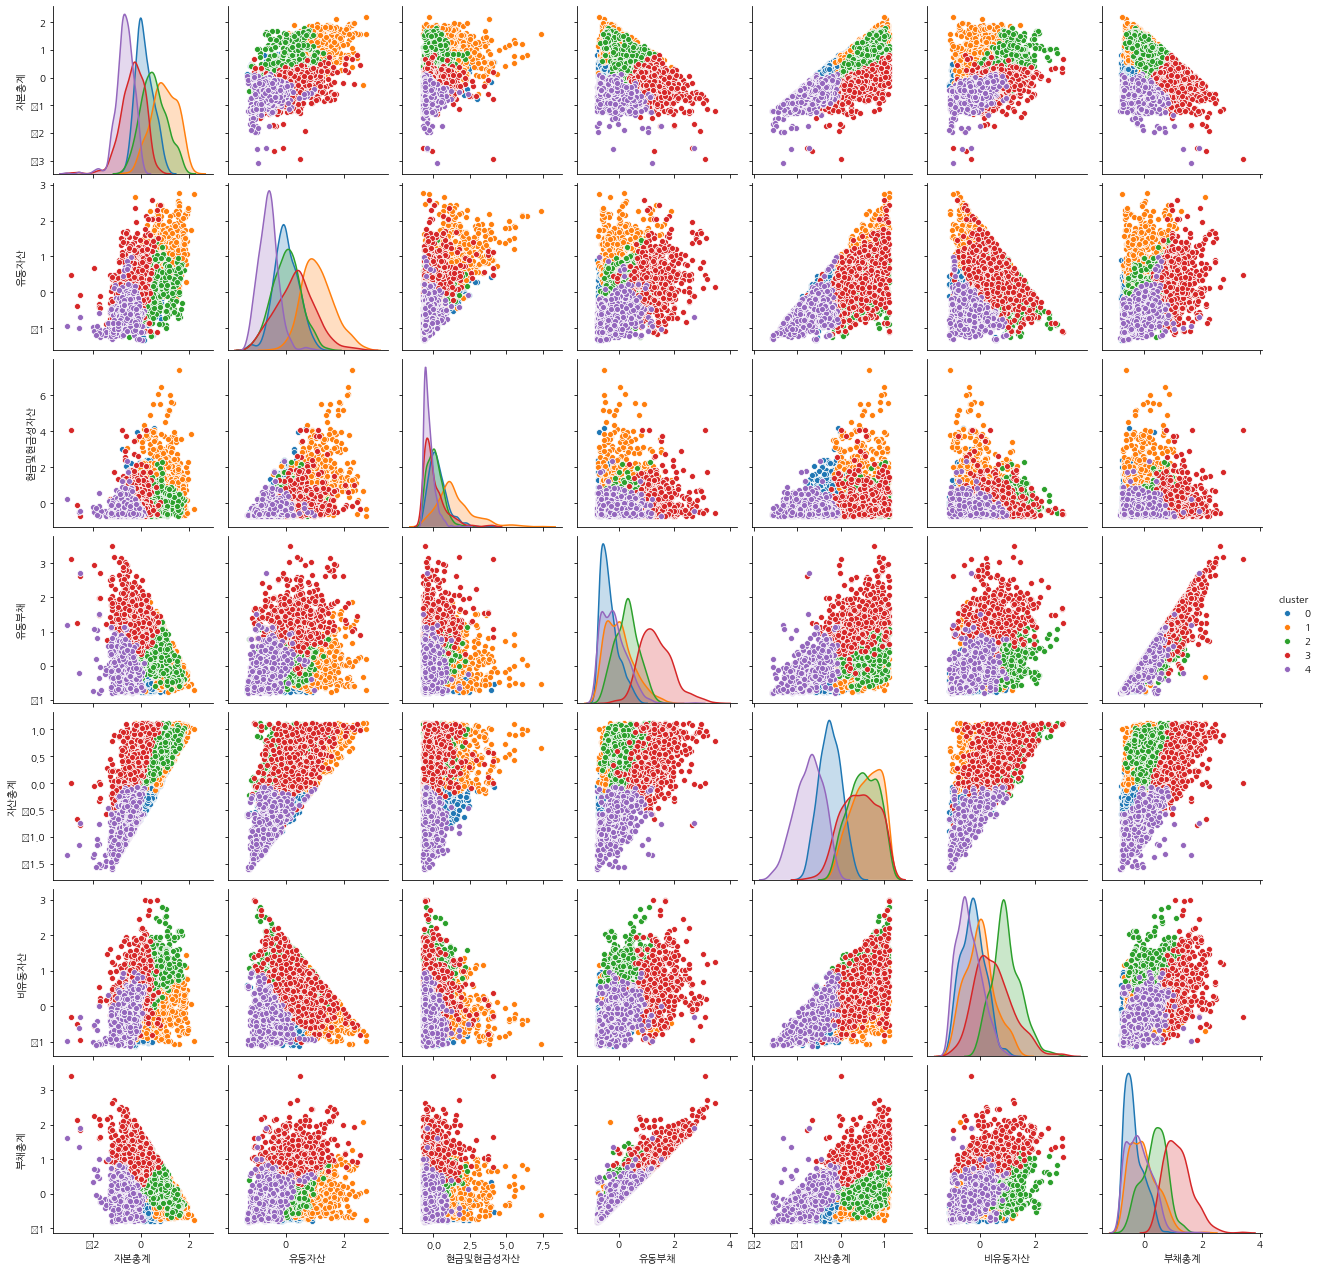

In [173]:
sns.pairplot(q1.iloc[:,9:], hue = "cluster")

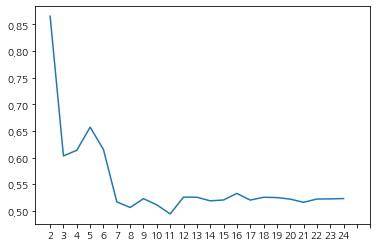

In [167]:
def score_lst(x):
    lst = []
    for i in range(2,25):
        kmedians = KMedians(k=i)
        kmedians.fit(np.array(x))
        lst.append(silhouette_score(np.array(x), kmedians.labels_))
    return lst
    

q1_score = score_lst(q4_scale[["자산총계"]])

plt.plot(q1_score)
plt.xticks(range(25), range(2,25))
plt.show()